# Linear Regression Recap and Intro to Classification

In the previous lecture, we used the example of **linear regression**. In this lecture, we will review the loss function for linear regression as well as look at residual analysis and how to detect and then rectify **heteroscedasticity**. We will also look the alternative of **polynomial regression** for when the data is not linear. In data science, it is essential to distinguish the type of problems we are solving. So far in this course, we have learned some **regression** techniques. We will now proceed to exploring methods to solve **classification** problems.

* __Regression__ - predicting a numeric value based on other values that are influence it in some way.
* __Classification__ - assigning a discrete "class" to a data point (for example, either Red or Blue) based on attributes of the data point.

In the next lecture, we will build upon the types of classifiers even more. 


## Loss Function

A good model will minimize the **loss function**, which is a measure of the difference between the model's prediction and the actual answer. The loss function for linear regression is the least squares error. To compute the total error associated with a simple linear regression model given some existing data points, we use the following process:

* Start with total error = 0.
* For each $x$ value, we compute what the predicted value of $y$ (which we've been referring to as $\hat{y}$) should be given our model. 
* We then compute the distance from this value to the actual value of $y$ at this value of $x$. We use the square of the Euclidean distance formula to calculate this distance ($(\sqrt{(y - \hat{y})^2})^2 = (y - \hat{y})^2$).
* Add this distance to the total error.

For example, suppose we had the single data point (5, 6). If our model is represented by the linear equation $y = 3 + 2x$, then our total error would be $(6 - (3 + 2(5)))^2 = 49$. This method of using Euclidean distance to compute total error is called __least-squares error__ (or __sum of squared error__). For our dataset, we will be using **root mean squared error** which normalizes the error by the number of data points. The formula version of this, given that we have $n$ data points, is:

$$\sqrt{\frac{\sum_{j = 1}^{n} (y_j - \hat{y})^2}{n}}$$

For those of you who are proficient in calculus, here is a link to an explanation on how to do simple linear regression using differentiation: https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf

### Using Python

Now it's time to create a full linear regression model using Python. We're going to go over how to create the "line of best fit" mentioned earlier in detail.

We start by creating a variable representing our model. We'll call this variable `reg`. To create this model we can use `sklearn`'s `LinearRegression` function.

We will be using the <a href="https://www.kaggle.com/jinxbe/wnba-player-stats-2017">WNBA player dataset</a>.

Equation: y = 0.974047 * x + -100.842543
Variance score: 0.593654
Root mean squared error: 6.984778


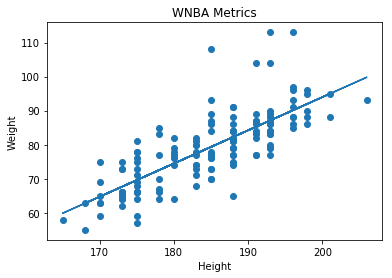

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

metrics = pd.read_csv('WNBA Stats.csv')
metrics = metrics.dropna()

metrics_reg = LinearRegression()
independent_var = 'Height'
dependent_var = 'Weight'
metrics_reg.fit(metrics[[independent_var]], metrics[[dependent_var]])
metrics['prediction'] = metrics_reg.predict(metrics[[independent_var]])

print('Equation: y = %f * x + %f' % (metrics_reg.coef_[0], metrics_reg.intercept_))
print('Variance score: %f' % r2_score(metrics[dependent_var], metrics['prediction']))
print('Root mean squared error: %f' % np.sqrt(mean_squared_error(y_true = metrics[dependent_var], y_pred = metrics['prediction'])))

plt.scatter(metrics[[independent_var]],metrics[[dependent_var]])
plt.plot(metrics[[independent_var]], metrics[['prediction']])
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title('WNBA Metrics')
plt.show()

## Heteroscedasticity

One of the assumptions required for linear regression is the errors have constant variance. This assumption is often violated when the variance of errors increases as data values increase (for example, on a plot of income vs. age, the variance of error in income could increase with age). This occurs when the model misses an underlying pattern. 

### Detecting Heteroscedasticity

Heteroscedasticity is detected after a model is made by looking at a plot of the residuals vs the fitted model. If a random scatterplot appears, then the model has constant variance. If a pattern appears (usually a cone shape), then the model is heteroscedastic. We will be using the same <a href="https://www.kaggle.com/jinxbe/wnba-player-stats-2017">WNBA player dataset</a> as above as the constant variance example and the <a href="https://www.kaggle.com/antfarol/car-sale-advertisements">car depreciation dataset</a> as the heteroscedastic example.

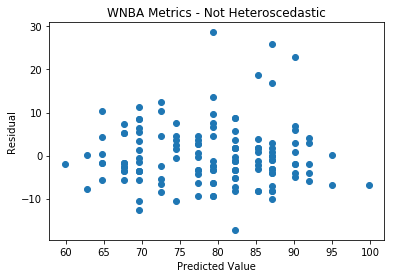

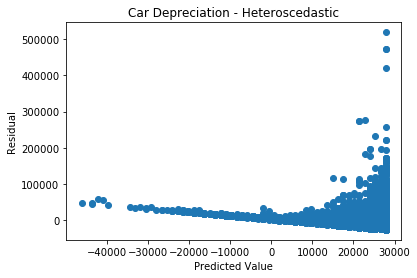

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# This first section is the same code as above
metrics = pd.read_csv('WNBA Stats.csv')
metrics = metrics.dropna()
metrics_reg = LinearRegression()
independent_var = 'Height'
dependent_var = 'Weight'
metrics_reg.fit(metrics[[independent_var]], metrics[[dependent_var]])
metrics['prediction'] = metrics_reg.predict(metrics[[independent_var]])
metrics['residuals'] = metrics[dependent_var] - metrics['prediction']

plt.scatter(metrics['prediction'],metrics['residuals'])
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('WNBA Metrics - Not Heteroscedastic')
plt.show()

# Here is an example of car depreciation
# Since the scatterplot has the cone shape, the model is heteroscedastic
car = pd.read_csv('car_ad.csv')
car = car.dropna()
car_reg = LinearRegression()
car_reg.fit(car[['year']], car[['price']])
car['prediction'] = car_reg.predict(car[['year']])
car['residual'] = car['price'] - car['prediction']
plt.scatter(car['prediction'],car['residual'])
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Car Depreciation - Heteroscedastic')
plt.show()

Another method is through a statistical test. Two such tests are the Breush Pagan Test and the NCV Test. Following traditional statistical tests, the null hypothesis is that the variance of residuals is constant. If the p-value is less than the significance threshold of 0.05, then the null hypothesis is rejected and the residuals are not constant. However, these tests require explanatory variables that could be the underlying reason why the data does not have constant variance. Oftentimes, it is difficult to know which variables are the explanatory variables or there is no data for other variables; so in these cases, examining a scatterplot is the best option. For more information, here is the <a href="http://www.statsmodels.org/stable/diagnostic.html">documentation</a> for the `statsmodels` library and there are multiple libraries with these tests. 

### Rectifying Heteroscedasticity

A **Box Cox Transform** is a method to normalize the residuals by outputting the option that best matches a normal curve. Again we will use the <a href="https://www.kaggle.com/antfarol/car-sale-advertisements">car depreciation dataset</a>. Notice how the scaled data no longer has a cone shape and has constant variance.

      price
0  0.500529
1  0.782760
2  1.311232
3  0.640719
5  0.570128


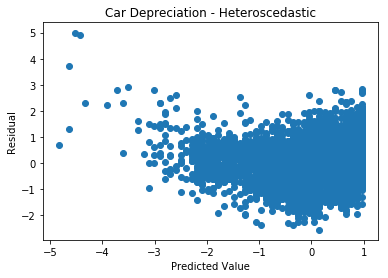

In [3]:
#First we transform the data, then the scatterplot has no pattern
import pandas as pd
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

car = pd.read_csv('car_ad.csv')
car = car.dropna()
# note: for preprocessing to work, data must be positive
car = car[car['price'] > 0]

car['price'] = preprocessing.scale(boxcox(car['price'])[0])
print(car[['price']].head())

car_reg = LinearRegression()
car_reg.fit(car[['year']], car[['price']])
car['prediction'] = car_reg.predict(car[['year']])
car['residual'] = car['price'] - car['prediction']
plt.scatter(car['prediction'],car['residual'])
plt.xlabel('Predicted Value')
plt.ylabel('Residual')
plt.title('Car Depreciation - Heteroscedastic')
plt.show()

## Polynomial Regression

In order for linear regression to perform as expected, the data must be **linear**. However in many cases, a regression model is ideal, but the prediction is better represented with an equation including $x^2$ or $x^3$. This is when **polynomial regression** is used instead. 

There are several types of regression that may be confused with one another. Logistic regression is used when the variable has two categorical values (like true or false) rather than numerical. Multinomial regression when the variable has more than two categorical values. Polynomial regression is used when the independent and dependent variable has a relationship best described with polynomial terms.

In this example we will be looking at a polynomial regression example. We will be using this <a href="https://www.kaggle.com/grubenm/austin-weather">Austin weather dataset</a>.

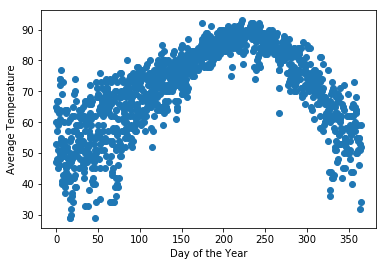

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('austin_weather.csv')
data = data[['Date', 'TempAvgF']]
# This code converts from a date to the day number in the year
date1 = np.datetime64(data['Date'][0])
data['Date'] = ((data['Date'].values.astype('datetime64[D]') - date1) / np.timedelta64(1, 'D')) % 365

plt.scatter(data['Date'],data['TempAvgF'])
plt.xlabel('Day of the Year')
plt.ylabel('Average Temperature')
plt.show()

This data is clearly not linear and a linear regression would give terrible results. Instead we will try polynomial regression with degree 2.

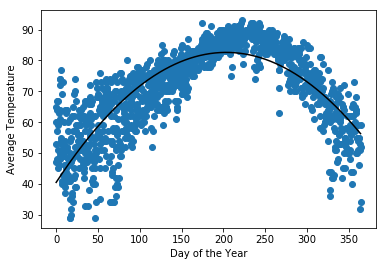

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('austin_weather.csv')
data = data[['Date', 'TempAvgF']]
# This code converts from a date to the day number in the year
date1 = np.datetime64(data['Date'][0])
data['Date'] = ((data['Date'].values.astype('datetime64[D]') - date1) / np.timedelta64(1, 'D')) % 365

poly = np.poly1d(np.polyfit(data['Date'],data['TempAvgF'],2))
data['prediction'] = poly(data['Date'])

plt.scatter(data['Date'],data['TempAvgF'])
plt.plot(data['Date'].unique(), data['prediction'].unique(), color="black")
plt.xlabel('Day of the Year')
plt.ylabel('Average Temperature')
plt.show()

Unfortunately, this parabola shape doesn't fit the data that well. If you look closely, the temperatures decrease slightly at the beginning of the year before increasing. This signals that a polynomial model with degree 3 would be a better fit.

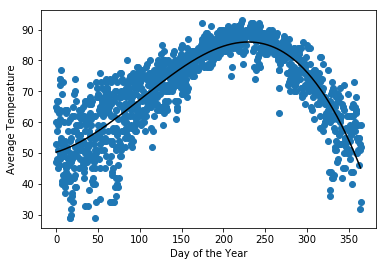

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('austin_weather.csv')
data = data[['Date', 'TempAvgF']]
# This code converts from a date to the day number in the year
date1 = np.datetime64(data['Date'][0])
data['Date'] = ((data['Date'].values.astype('datetime64[D]') - date1) / np.timedelta64(1, 'D')) % 365

poly = np.poly1d(np.polyfit(data['Date'],data['TempAvgF'],3))
data['prediction'] = poly(data['Date'])

plt.scatter(data['Date'],data['TempAvgF'])
plt.plot(data['Date'].unique(), data['prediction'].unique(), color="black")
plt.xlabel('Day of the Year')
plt.ylabel('Average Temperature')
plt.show()

## Introduction to Classification

### Bayesian Classifier: ideal classifier

The **Naive Bayes Classifier** applies Bayes' theorem with the assumption that all parameters are independent. 

For example, two features that may be used to classify a fruit are its color and shape. So a _red_ and _round_ fruit would be classified as an apple.

The Naive Bayes Classifier considers each of these features to contribute independently to the probability that this fruit is an apple. **Regardless** of any possible correlation between the color and the shape. 

#### Bayes' Theorem 

Bayes' Theorem calculates the probability that some event A occurs given that event B occurred. Formally it is given as: 

$$P(A \ | \ B) = \frac{P(B \ | \ A) \ P(A)}{P(B)}$$

$P(A \ | \ B)$ is the probability that $A$ will occur given that $B$ occurred. For example, if we want to find the probability of eating out in college town (event $A$) given that it is finals week (event $B$). The probability of eating out on any random day, $P(A)$, is probably low if you are a college student. However, the probability will most likely rise if it is a random day during the final week, because students won't have time to cook. Thus, the probability of eating out in College Town given that it is finals week is represented by $P(A \| \ B)$. Put another way, conditionally probability measures how probabilities change when we get **new** information. In the previous example the new information was the fact that finals were going on.

#### Independence (Quick Stats Review 2)
By definition, two events are **independent** if the occurrence of one event has no effect on the probability of the occurrence of another event.
Two events are independent if the following is true: 

$$P(A\cap B) = P(A) \ P(B)$$

This assumption will make the calculation of naive Bayes significantly easier.

#### Naive Bayes
Let's imagine we want to identify the gender of a randomly selected person given their social media profile (of course the gender information is missing). We have many feature parameters such as name, picture, where this person is from, high school, favorite music, liked posts, shared events etc. 

Naive Bayes will calculate the probability of this particular individual being male given those parameters and compare it with the probability of this individual being female given the parameters. If the probability of being male is higher than female, the classifier predicts this person to be male.

Looking at the math, let's say we have n feature variables called $X_1, X_2, X_3, ... , X_n$. Also we define the probability of a person being male as P(M), and female as P(F).

Naive Bayes will compare $P(M|X)$ and $P(F|X)$.

From Bayes' Theorem, we can state following relationship:

$$P(M|X) = \frac{P(X|M)\times P(M)}{P(X)} = \frac{P(X_1\cap X_2\cap... X_n|M) \  P(M)}{P(X)}$$

By assuming all parameters are independent, we have the following:

$$P(X_1\cap X_2\cap... X_n|M) = P(X_1|M) \ P(X_2|M) \ ...  \ P(X_n|M)$$

So what does this mean? In this particular problem, the Naive Bayes Classifier will look at the social media profile of an individual. Then it calculates conditional probabilities for each parameter. For example, how likely is the person a female, given that their name is Peter. How likeley is this person a female given that they listen to a lot of jazz etc. The result of these individual features will be multiplied all together to find the probability of this individual being female.

One thing to note here is that we don't know the actual distributions of the features, so we have to make certain assumptions about the distributions. 

In the `scikit.learn` library, there are three types of Naive Bayes model based on the assumptions each model makes about the distribution. The **Gaussian** model assumes that the parameters are distributed *normally*. The **Bernoulli Naive Bayes** model deals with binary feature values. Finally, the **Multinomial** model deals with discrete counts, such as word count in a document for a text classification problem. 

#### Naive Bayes in Python

In [7]:
# Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

# assigning predictor and target variables
x = np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x, y)

# Predict Output 
predicted = model.predict([[1,2],[3,4]])
print(predicted)

[3 4]


### Linear Separability
In Euclidean geometry, two sets of points are linearly separable if there exists at least one line in the plane with all of the points from one set on one side of the line and all the points from the other set on the other side (as in the image below). This idea immediately generalizes to higher-dimensional Euclidean spaces if the line is replaced by a hyperplane. 

<img src="https://i.stack.imgur.com/fFaAp.jpg" width="200">


We can think of classifying data as trying to find this line (or hyperplane) that separates the different sets of points. Sometimes it is possible that the data sets are not linearly separable, in which case we could use the kernel trick with **support vector machines** (discussed more in a later lecture) to transform 

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_8.png" width="300">

into 
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_9.png" width="300">

and find the separating line: 

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_10.png" width="300">


### k Nearest Neighbors
One of the simplest classification models is called K Nearest Neighbors, or kNN. In kNN, the prediction is made based on a majority vote among its neighbors, increasing the searching radius around the point until the number of neighbors sums up to k. As such, k tends to be a small integer, and often an odd number in order to be a tie-breaker. For example, if you implement kNN classifier with k-value of 3, the classifier will keep searching the neighbors around the prediction point until finding 3 neighbors. While kNN is very easy to interpret, it is called an instance-based learning or **lazy learning** since the algorithm is only applied locally and not all data in the dataset is used for the prediction. In the "training phase" of a kNN classifier, the model simply stores all data points and their categories.

<img src="https://mayuresha.files.wordpress.com/2013/04/knn.jpg" width="400">


#### K-value Selection
Using the "right" k-value will significantly affect the output of the classifier. If you choose larger k-value, the model will become more robust to small noises; however, the boundary line between 2 classes will be less distinct. Intuitively, with the larger k-value, the borderline between classes becomes smoother while the smaller k-value will have a potential problem of over-fitting. For example, when k is 1, the closest neighbor in train data becomes the point itself. Thus, the accuracy of this model on training dataset will be 100%. However, this model simply predicts a datapoint to be the identical class with its closest neighbor. This method is only useful for the initial analysis of data or classification of very large datasets.

Smaller k value will increase variance in the outputs but tends to overfit the classifier. On the other hand, larger k value will increase bias while becoming more robust to the outliers. 

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement.png" width="500">

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement2.png" width="500">


#### Weighted Nearest Classifier
Intuitively speaking, if the point to predict is located very closely to some class A, it is very likely to belong to A. On the other hand, the confidence level decreases as the distance from the closest point increases. The algorithm to apply this "intuition" is called weighted nearest classifier. This model simply improves the normal kNN classifier by calculating the weighted sum of neighbors as it multiples by 1/d where d is the distance from the center. This will account for the fact that the distance from the point and the confidence level of prediction is in the negative correlation.

#### kNN in Python

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)

distances, indices = nbrs.kneighbors(X)

### The Confusion Matrix

The confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The higher the true positive rate and true negative rates are, the better the model's predictions match the true values. 

<img src="http://3.bp.blogspot.com/_txFWHHNYMJQ/THyADzbutYI/AAAAAAAAAf8/TAXL7lySrko/s1600/Picture+8.png" width="300">

### Sensitivity vs. Specificity
**Sensitivity** is also known as the **true positive rate**, and is the proportion of true positives out of the entire pool of "actual positives." It is calculated as follows: 

**Sensitivity = True Positive/(True Positive + False Negative)**

An example in which sensitivity is important is diagnosing patients with a fatal disease. We want to be able to predict correctly if a particular patient has the disease. 


**Specificity** is also known as the **true negative rate**, and is the proportion of true negatives out of the entire pool of "actual negatives.". It is calculated as follows: 

**Specificity = True Negative/(True Negative + False Positive)**

If we want to instead calculate the amount of people who are healthy (not sick), we would want to consider the true negative rate. 

It is important to understand that there will always be a trade-off between the two characteristics. This trade-off is best understood in terms of how we set our threshold values (discussed below).

### Accuracy
The overall accuracy is the proportion of all predictions that are true positives and true negatives. 

**Accuracy = (True Positive + True Negative)/Total**

The overall error rate is the proportion of all predictions that are false positives and false negatives. 

**Error Rate = (False Positive + False Negative)/Total**

Overall error rate - proportion of all predictions that are false positives and false negatives

### Precision and Recall
**Precision** is the proportion of all correct positive predictions among all positive predictions. It is calculated as follows: 

**Precision = True Positive/(True Positive + False Positive)**

**Recall** is just another name for sensitivity. Here is the formula again: 

**Recall = True Positive/(True Positive + False Negative)**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png" width="300">

### Threshold
Since we are trying to classify instances into two different classes, it is important that our model's output is **binary**, namely 0 and 1. Oftentimes while the output does have an output between 0 and 1, the output is continuous. So how do we convert it to 0 and 1?

We use something called a **threshold** value, such that if the output of f(x) > threshold, then 1; otherwise, 0. As a general formula:  
![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/aab892e7cf0d00aa6da3aa051335900ff52d12a0)

The threshold value is the epsilon value in the equation.

### ROC Curve
ROC curve stands for Receiver Operating Characteristic curve. A ROC curve is a visualization of sensitivity-specificity trade-off of a classifier model. On an ROC curve, each point corresponds to a specific threshold value. 

Since an ROC curve shows the sensitivity-specificity trade-off, let us consider the trivial case: classifying everything as the same value. If we classify all points as positive, **sensitivity = 1 and specificity = 0**. All positive data points have been classified as positive, along with all the negative data points.

On the contrary, if everything was classified as negative, **sensitivity = 0 and specificity = 1**. All negative points have been classified correctly.

Sensitivity **decreases** as threshold grows, since the predictor will classify more and more positive points incorrectly.

Specificity **increases** as threshold grows, since the predictor will classify more and more negative points correctly.

As in the image shown below, a classifier that does a good job at separating the classes will have an ROC curve that hugs the upper left corner of the graph. In other words, an accurate classifier's ROC curve will have **area under the curve (AUC)** of close to 1, whereas a poor classifier's ROC curve will have an AUC of close to 0.5. 

![image](http://gim.unmc.edu/dxtests/roccomp.jpg)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# the AUC of each class vs the rest
roc_auc

{0: 1.0, 1: 0.7990580847723705, 2: 1.0}

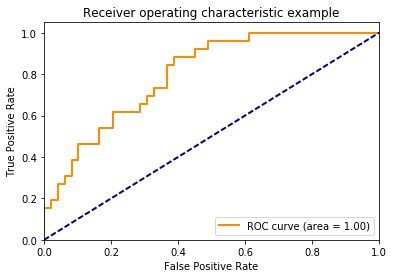

In [10]:
# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Multiclass Classification
So far, we have only dealt with **binary classification**, where we classified instances into two classes. Now we will take a look at **multiclass classification** - classifying instances into three classes or more. 

#### One-vs-all
The one-vs-all strategy involves training a single classifier per class, with all samples of that class considered as positive and samples of all other classes considered as negative. Note that the ROC curve can be extended in this fashion to be used in multiclass classification as well.

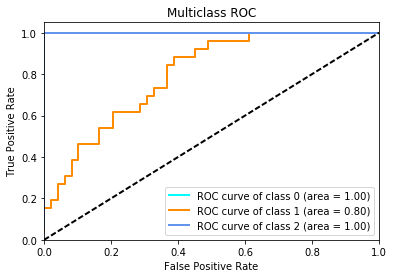

In [11]:
from itertools import cycle
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.show()

## Sources
https://www.r-bloggers.com/how-to-detect-heteroscedasticity-and-rectify-it/

https://www.safaribooksonline.com/library/view/statistics-in-a/9781449361129/ch11.html

https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn